#  

╔══<i><b>Algorithm AI</b></i>═══════════════════════════════════════╗
###  &nbsp;&nbsp; **✎&nbsp;&nbsp;Day 0. 크 - 인공지능에 취한다.**
# 손글씨로 쓴 숫자이미지를 인식하는 인공지능 만들기
Algorithm AI, last updated at 2019/03/01 (Fri) by PAI

### _Objective_
1. 텐서플로우를 이용하여 간단한 합성곱 신경망 구조를 가진 인공지능을 개발해봅시다.<br>
2. 여러분들이 직접 인공지능을 만들고 학습하는 과정을 통해 인공지능에 흥미를 가지고 가능성을 확인할 수 있습니다.<br> 
3. 딥러닝 개발을 배운 후 여러분들이 직접 만든 인공지능으로 무엇을 할 수 있을 지 상상해 봅시다.<br>

  
╚═══════════════════════════════════════════════╝

# \[ Ⅰ. 환경설정 \]

---

---

본격적으로 인공지능을 만들기에 앞서, 개발에 필요한 도구들의 툴박스(Python Package)를 작업 환경에 두어야 합니다.<br>

다음 코드를 실행하므로써,<br>
1. 인공지능 모델을 만드는데 필요한 도구들을 가진 패키지 tensorflow<br>
2. 데이터와 결과를 시각적으로 보여주는 도구를 가진 패키지 matplotlib.pyplot<br>
3. 숫자와 행렬, 배열들의 수치계산을 도와주는 도구를 가진 패키지 numpy<br>
4. Python이 가진 몇가지 기능과 변수들을 제어하는 도구를 가진 패키지 sys<br>

를 작업 환경으로 가져와 사용할 수 있게 합니다.

In [0]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import sys


# \[ Ⅱ. MNIST Dataset 톺아보기 \]

---

---


## ✎ 1. 데이터셋 설명

---

1. 우리가 실습에서 사용할 Data는 0부터 9까지의 숫자를 손으로 작성한 손글씨데이터, "MNIST" 입니다.
2. MNIST 데이터셋은 70,000개의 이미지로 구성되어있습니다.
3. 70,000장의 이미지 중 <br>
  (1) 55,000장은 학습데이터(training set)<br>
  (2) 5000장은 검증데이터(Validation set) <br>
  (3) 10,000장은 테스트데이터(Test set)<br>로 활용됩니다.
4. 각 데이터는 크기가 28 x 28 인 흑백이미지이며,<br>
  이미지의 각 픽셀 위치에는 진하기에 따라 0부터 1사이의 값으로 구성되어있습니다.
  
<img src="https://i.imgur.com/7xOGINj.png" width = "200px">

<img src="https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png" width = "300">

## 2. MNIST 이미지 데이터 셋 불러오기

---

우리는 tensorflow 에서 제공해주는 input_data 라는 모듈(module) 을 통해 MNIST 데이터 셋을 쉽게 불러올 수 있습니다.


In [6]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


현재, mnist라는 하나의 변수에는 우리가 MNIST의 모든 데이터가 학습용, 검증용, 평가용 데이터셋으로 나누어져 담겨 있습니다.<br>
우리는 이를 다시 각각 독립변수(feature : Image)와 종속변수(labels : Number) 로 나누어 서로 다른 변수에 저장할 것입니다. <br>
<br>
+ 독립변수(feature : Image)는 우리가 예측하고자하는 이미지 데이터<br>
+ 종속변수(labels : Number)는 해당 이미지 데이터의 정답값<br>
을 의미합니다.


In [0]:
# 영상의 이미지와 라벨 가져오기

## 학습용 데이터셋 불러오기 
train_images = mnist.train.images
train_labels = mnist.train.labels
# 검증용 데이터셋 불어오기
valid_images = mnist.validation.images
valid_labels = mnist.validation.labels
# 평가용 데이터셋 불러오기
test_images = mnist.test.images
test_labels = mnist.test.labels

<br>

## 3. MNIST 이미지 데이터 확인하기

---

우리는 이미지 데이터를 인식하는 인공지능을 만들것입니다.<br>
인공지능이 인식할 이미지 데이터의 개수와, 실제로 어떤 이미지인지 확인해봅시다.



In [0]:
print("학습용 데이터 갯수 : ", train_images.shape[0])
print("검증용 데이터 갯수 : ", valid_images.shape[0])
print("평가용 데이터 갯수 : ", test_images.shape[0])

학습용 데이터 갯수 :  55000
검증용 데이터 갯수 :  5000
평가용 데이터 갯수 :  10000


현재 데이터셋들은 모두, 784개의 펼쳐진 1차원 정보들로 구성되어 있습니다. 우리는 이미지로 보기 위해서는 이를 2차원으로 형태를 변환해 줄 필요가 있습니다.

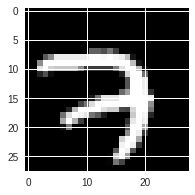

In [37]:
image = train_images[0] # 첫번째 이미지 가져오기
image = image.reshape(28,28) # 이미지를 (784,) => (28,28)로 바꾸어줌
plt.figure(figsize=[3,3])
plt.imshow(image, cmap="gray")
plt.show()

## 2. MNIST 라벨 (labels : 정답값) 확인하기

---

라벨(label)은 해당 이미지데이터가 실제로 어떤 값을 나타내는지에 대한, "정답값"입니다.<br>
하지만 우리들의 MNIST 에는 정답값을 0 ~ 9의 숫자로 저장되어있지 않습니다.<br>
다음 코드를 통해 어떻게 저장되어있는지 확인해 봅시다.


In [9]:
print("학습용 라벨의 형태 : ",train_labels.shape)
print("검증용 라벨의 형태 : ",valid_labels.shape)
print("평가용 라벨의 형태 : ",test_labels.shape)

학습용 라벨의 형태 :  (55000, 10)
검증용 라벨의 형태 :  (5000, 10)
평가용 라벨의 형태 :  (10000, 10)


In [0]:
sample_labels = train_labels[:5] # 첫번째부터 5번째의 라벨만 가져옴

one-hot 인코딩은 분류를 위해 사용되는 인코딩 방식입니다. <br>

* 0 : [1, 0, 0, ..., 0]
* 1 : [0, 1, 0, ..., 0]
* 2 : [0, 0, 1, ..., 0]

으로 각각 바꾸어 줍니다.<br>
one-hot 인코딩된 데이터는 배열 내에서 "1"의 위치를 통해 몇번째 분류인지를 표현합니다.<br>

In [12]:
sample_labels

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]])

one-hot으로 변환된 값은 아래와 같이 원래의 값으로 변경할 수 있습니다.
> argmax : 배열 내 가장 큰 값이 있는 위치값(index)를 가져옵니다.<br>
> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
> 모든 원소의 값이 0인 배열에서 단 한개의 원소만 1일경우, 가장 큰값은 1이 될 것 입니다.

In [13]:
sample_labels.argmax(axis=1) # 각 행에서 인덱스가 1인 좌표를 가져옵니다.

array([7, 3, 4, 6, 1])

학습 데이터 셋에 있는 라벨들의 분포는 아래와 같습니다.<br>
우리는 pyplot 모듈을 이용하여 분포를 시각화해 볼 수 있습니다.


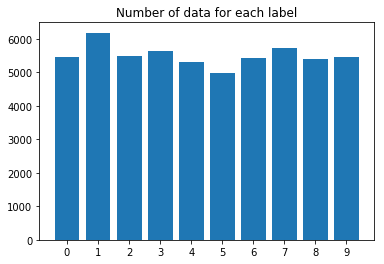

In [0]:
plt.title("Number of data for each label")
plt.bar(x=range(10),
        height=train_labels.sum(axis=0))
plt.xticks(range(10))
plt.show()

**각 라벨(정답값) 별로 갯수가 정확히 같지는 않지만 어느정도 균일한 것을 확인할 수 있습니다.**<br>
따라서, 우리가 활용할 MNIST 데이터는 특정 숫자에 치우치지 않고 적당히 분포되어있는 데이터임을 알 수 있습니다.

<br><br>


# \[ Ⅲ. 이미지 데이터에서 특징을 추출하는 방법 \]

---

---


1. 인공신경망이란 생물체들이 가진 신경망에서 영감을 얻어 인공지능의 개발에 활용한 인공지능 학습 알고리즘입니다.
2. 생명체의 신경망(Neuron Network)이 객체를 인지하고, 특징을 뽑아내는 과정에 착안하여 인공신경망의 구조 및 연산을 연구하였습니다.
3. 그 중 합성곱신경망(CNN : Convolution Neural Network)이란, 이미지와 같이 Grid 한 데이터에 특화된 구조와 작동을 가진 인공신경망입니다.



+ 우리(생물체)는 이미지를 인지할 때, <br>
우리의 뇌속(신경망)에서는 이미지의 전체 모습을 **한번에 파악하는 것이 아니라**<br>
이미지의 **아주 작은 특정 부분의 특징들을 먼저 뽑아내어 파악한 후 그 특징들을 조합하는 단계를 여러번 거쳐 전체 이미지를 파악**합니다. 

<br>

이러한 생물체의 **이미지 인식 원리에 착안하여 만들어진 합성곱 층(Convolution Layer)**를 파헤쳐봅시다.

<br>
<img src="https://i.imgur.com/KyZAOQJ.jpg" width="500">


<br>

## ✎ 1. 합성곱 층 : Convolution Layer 이해하기

---

합성곱신경망(CNN : Convoulution Neural Network)에 들어가는 합성곱 층(Convolution Layer)이 무엇인지 알아보겠습니다.

### 1) 합성곱(Convolution) 연산
+  kernel이라 불리는 작은 매트릭스를 이미지의 **부분 별로** 곱해나가는 연산입니다.
+  "kernel" 대신 "filter" 라고도 합니다.

![Imgur](https://i.imgur.com/op9Maqr.png)




### 2) 합성곱(Convolution) 연산의 과정

<img src="https://taewanmerepo.github.io/2018/01/cnn/conv.png" width="700">

1. 커널의 각 원소와 이미지의 해당 부분의 각 원소를 각각 곱합니다.
2. 각각 곱한 값들을 모두 더하여 하나의 값으로 만듭니다.
3. 그것을 출력(feature Map)의 해당하는 위치에 담습니다.

<img src="http://deeplearning.stanford.edu/wiki/images/6/6c/Convolution_schematic.gif" width="400">

4. 커널의 위치를 이미지의 다음 위치로 이동합니다.
5. 이러한 연산을 이미지의 끝까지 진행하여 **이미지 전체에 순차적으로 적용**합니다.

> **컨볼루션 연산은 어떤 커널의 값에 따라, 영상에서 원하는 정보을 부각시키거나, 필요 없는 정보를 줄이는 역할을 합니다.**<br>
( 데이터의 의미있는 부분을 추출하여 압축 )


<br>
## 2. 합성곱(Convolution) 연산 체감하기

---

1. Python 과 Tensorflow 프로그래밍으로 합성곱 연산을 직접 구현해봅시다.<br>
2. Tensorflow의 구조와 처리 과정을 간단한 프로그래밍을 통해 이해해봅시다.<br>
3. 연산의 결과를 확인하여 합성곱 연산의 의미를 파악해봅시다.

### 1) 임의의 필터(커널 : Kernel) 만들기

In [0]:
# 임의의 필터를 직접 디자인해봅시다.
kernels = np.zeros(shape=(7, 7, 1, 2), dtype=np.float32)
kernels[:, 3, 0, 0] = 1
kernels[3, :, 0, 1] = 1

### 2) 필터(커널 : Kernel )을 시각적으로 확인하기

#### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;⓵ 0번째 필터 : 세로의 특징을 추출하는 필터

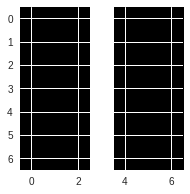

In [24]:
# 0번째 필터 
# 세로의 특징을 추출하는 Filter 
plt.figure(figsize=(3,3))
plt.imshow(kernels[:, :, 0, 0] , cmap='gray',)
plt.show()

#### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;⓶ 1번째 필터 : 가로의 특징을 추출하는 필터

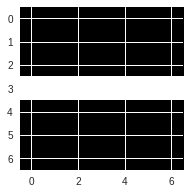

In [26]:
# 1번째 필터
# 가로의 특징을 추출하는 Filter 
plt.figure(figsize=(3,3))
plt.imshow(kernels[:, :, 0, 1] , cmap='gray')
plt.show()

### 3) Tensorflow 실행하기

Tensorflow의 프로그래밍는 크게 두가지 단계로 나뉘어집니다.

1. 계산을 정의하기 (그래프를 만드는 단계)
2. 계산을 실행하기 (세션을 통해 계산을 실행하는 단계)

#### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;⓵ 텐서플로우 그래프 만들기

In [0]:
tf.reset_default_graph() # Graph를 초기화해줍니다.

# 아래의 tf.placeholder, constant, conv2d ... 등은 Graph의 노드로
# 어떤 순서로 계산하는지를 결정합니다.

# 입력 노드 만들기 
X = tf.placeholder(tf.float32, shape=(None, 28, 28, 1))

# 위에서 만들었던 kernels을 tensor node 에 집어 넣습니다.
kernel_node = tf.constant(kernels)

# Convolution 연산을 정의합니다.
convolution = tf.nn.conv2d(X, kernel_node, 
                           strides=[1,1,1,1],
                           padding="SAME")

#### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;⓶ 세션 실행하기

In [0]:
sess = tf.Session()

tf_image = image.reshape((1,28,28,1)) # 텐서플로우에서 연산할 수 있는 형태로 변환

# 컨볼루션 연산을 실행
conv_output = sess.run(convolution, feed_dict={X: tf_image})

### 4) 시각적으로 확인하기(Visualization)

#### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;⓵ 0번째 필터 : 세로의 특징을 추출하는 필터

output 0 shape :  (28, 28)


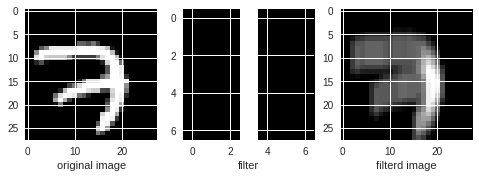

In [29]:
output_0 = conv_output[0,:,:,0]
fig = plt.figure()

ax = fig.add_subplot(1,3,2)
ax.imshow(kernels[:, :, 0, 0] , cmap='gray')
ax.set_xlabel('filter')

ax = fig.add_subplot(1,3,3)
ax.imshow(output_0, cmap='gray')
ax.set_xlabel('filterd image')

ax = fig.add_subplot(1,3,1)
ax.imshow(image, cmap='gray')
ax.set_xlabel('original image')

print('output 0 shape : ',output_0.shape)
plt.show()

#### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;⓶ 1번째 필터 : 가로의 특징을 추출하는 필터

output 1 shape :  (28, 28)


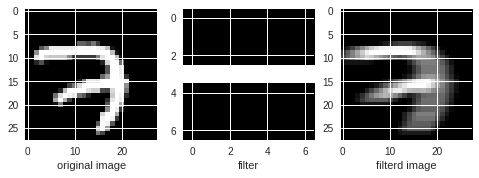

In [30]:
output_1 = conv_output[0,:,:,1]
fig = plt.figure()

ax = fig.add_subplot(1,3,2)
ax.imshow(kernels[:, :, 0, 1] , cmap='gray')
ax.set_xlabel('filter')

ax = fig.add_subplot(1,3,3)
ax.imshow(output_1, cmap='gray')
ax.set_xlabel('filterd image')

ax = fig.add_subplot(1,3,1)
ax.imshow(image, cmap='gray')
ax.set_xlabel('original image')

print('output 1 shape : ',output_1.shape)
plt.show()

<br>

## 3. 풀링 연산 ( Pooling ) 체감하기

---

### 1) Pooling 연산 이해하기

<img src="https://taewanmerepo.github.io/2018/02/cnn/maxpulling.png" width="400">


풀링 연산은 이미지의 크기를 줄이는 역할로 이루어 집니다. <br>
줄이는 방식에는 주로 두가지 방법이 있습니다.

1. Max Pooling : 특정 영역 안 최대값을 추출하기
2. Average Pooling : 특정 영역 안 평균을 구하기

이번 실습에서는 LeNet에서 다룬 Average Pooling을 직접 실습해보겠습니다.

### 2) Tensorflow 그래프 만들기

In [0]:
tf.reset_default_graph() # Graph를 초기화해줍니다.

# 입력 노드 만들기 
X = tf.placeholder(tf.float32, shape=(None, 28, 28, 1))

# 풀링 연산을 실행합니다.
pooling = tf.nn.avg_pool(X,
                         ksize=[1,2,2,1],
                         strides=[1,2,2,1],
                         padding='VALID')

### 3) 세션 실행하기

In [0]:
sess = tf.Session()

tf_image = image.reshape((1,28,28,1)) # 텐서플로우에서 연산할 수 있는 형태로 변환

# 컨볼루션 연산을 실행
pool_output = sess.run(pooling, feed_dict={X: tf_image})

### 4) 결과 확인하기

stride 2 output Image shape :  (14, 14)


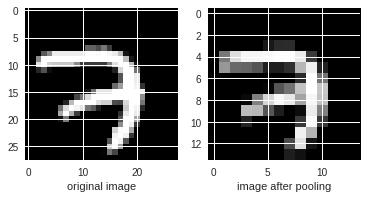

In [40]:
output_0 = pool_output[0,:,:,0]
fig = plt.figure(figsize=[6,6])

ax = fig.add_subplot(1,2,1)
ax.imshow(image, cmap='gray')
ax.set_xlabel('original image')

ax = fig.add_subplot(1,2,2)
ax.imshow(output_0, cmap='gray')
ax.set_xlabel('image after pooling')

print('stride 2 output Image shape : ',output_0.shape)
plt.show()

**pooling이 진행된 Image는 그 크기(Size)가 기존의 이미지의 절반으로 감소한 것을 확인할 수 있습니다.**

<br><br>

# \[ Ⅳ. 인공신경망 ( Artificial Neural Network ) 디자인하기 \]

---

---



1. 우리는 위에서 배운 합성곱 층(Convolution Layer)과 풀링 층(Pooling Layer), 그리고 그밖의 다양한 층(Layer)들을 조합하여 인공신경망의 구조를 설계할 수 있습니다.
2. 이렇게 설계된 인공신경망의 설계 구조와 각 층을 구성하는 값들에 의해 인공지능의 성능과 결과가 크게 좌우됩니다.
3. 그 중 Convolution Layer를 최초로 사용한 인공신경망 구조인 LeNet-1 모델을 직접 구현해봅시다.


## 1. LeNet-1

---

** 아래 이미지는 1989년에 만들어졌으며 세계에서 가장 처음으로 성공적인 합성곱신경망 모델중 하나로 평가되고 있는 LeNet-1 의 구조입니다.**
<br>
<br>
<br>

  ![](https://cdn-images-1.medium.com/max/1600/1*ge5OLutAT9_3fxt_sKTBGA.png)

<br>

**그리고, 아래 표는 LeNet의 스펙입니다.**<br>
이미지데이터는 Input에서 Output까지 각 Layer에서 연산을 진행하게 됩니다.

<img src="https://i.imgur.com/lW6AWnN.png" width="700">


**그럼 이제, MNIST 이미지 데이터를 인식할 수 있는 LeNet-1 모델의 인공지능을 만들어 봅시다 !**

<br>

## 2. 신경망 구축하기

---


### 1) Tensorflow 그래프 만들기

In [0]:
height = 28
width = 28
channels = 1

n_classes = 10

tf.reset_default_graph()

X = tf.placeholder(tf.float32, shape=[None, height*width], name="X")
X_reshaped = tf.reshape(X, shape=[-1, height, width, channels])
y = tf.placeholder(tf.int32, shape=[None, 10], name="y")

In [43]:
# Layer 0
conv_ksize_0 = 5 # Filter의 크기
conv_outch_0 = 4 # Filter의 갯수
conv_stride_0 = 1
conv_pad_0 = "VALID"

filter_init_0 = tf.truncated_normal(shape=[conv_ksize_0, conv_ksize_0,
                                           channels, conv_outch_0],
                                    dtype=tf.float32,
                                    stddev=0.1)
conv_filter_0 = tf.Variable(filter_init_0)

bias_init_0 = tf.constant(0, shape=[conv_outch_0],
                          dtype=tf.float32)
conv_bias_0 = tf.Variable(bias_init_0)

conv0 = tf.nn.conv2d(input=X_reshaped, 
                     filter=conv_filter_0,
                     strides=[1, conv_stride_0, conv_stride_0, 1],
                     padding=conv_pad_0)

layer_0 = tf.nn.sigmoid(conv0+bias_init_0)

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
# Average Pooling 
pool1 = tf.nn.avg_pool(layer_0, 
                       ksize=[1, 2, 2, 1], 
                       strides=[1, 2, 2, 1], 
                       padding="VALID")

In [0]:
# layer 1
conv_ksize_1 = 4
conv_outch_1 = 8
conv_stride_1 = 1
conv1_pad = "VALID"

filter_init_1 = tf.truncated_normal(shape=[conv_ksize_1, conv_ksize_1,
                                           conv_outch_0, conv_outch_1],
                                    dtype=tf.float32,
                                    stddev=0.1)
conv_filter_1 = tf.Variable(filter_init_1)

bias_init_1 = tf.constant(0, shape=[conv_outch_1], dtype=tf.float32)
conv_bias_1 = tf.Variable(bias_init_1)

conv1 = tf.nn.conv2d(input=pool1,
                     filter=conv_filter_1,
                     strides=[1, conv_stride_1,conv_stride_1, 1],
                     padding=conv1_pad)

layer_1 = tf.nn.sigmoid(conv1+conv_bias_1)

In [0]:
# Average Pooling 
pool2 = tf.nn.avg_pool(layer_1, 
                       ksize=[1, 2, 2, 1], 
                       strides=[1, 2, 2, 1], 
                       padding="VALID")

In [47]:
#flat 
pool2_flat = tf.layers.flatten(pool2)

Instructions for updating:
Use keras.layers.flatten instead.


In [48]:
# Output
logits = tf.layers.dense(pool2_flat, n_classes, name="output")

Instructions for updating:
Use keras.layers.dense instead.


In [49]:
# Train op 
xentropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y)
loss = tf.reduce_mean(xentropy)
optimizer = tf.train.AdamOptimizer()
training_op = optimizer.minimize(loss)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [0]:
# Metric 
pred_cls = tf.argmax(logits, axis=1)
y_cls = tf.argmax(y, axis=1)    
correct = tf.equal(pred_cls , y_cls)
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

In [0]:
# initializer
init = tf.global_variables_initializer()

In [0]:
# Save
saver = tf.train.Saver()

### 2) 구축한 LeNet-1 모델 학습시키기

In [53]:
n_epochs = 20
batch_size = 100
n_iters = mnist.train.num_examples // batch_size

sess = tf.Session()
sess.run(init)

val_loss_list = []
val_acc_list = []
train_loss_list = []
train_acc_list = []

for epoch in range(n_epochs):
    for idx in range(n_iters):
        sys.stdout.write('\r progress {}/{}'.format(idx , n_iters))
        sys.stdout.flush()
        X_batch, y_batch = mnist.train.next_batch(batch_size)
        sess.run(training_op,
                 feed_dict={X: X_batch, y: y_batch})
    
    
    train_acc, train_loss = sess.run([accuracy, loss],
                                     feed_dict={X: train_images,
                                                y: train_labels})
    train_loss_list.append(train_loss)
    train_acc_list.append(train_acc)
    
    val_acc, val_loss = sess.run([accuracy,loss], 
                                 feed_dict={X: valid_images,
                                            y: valid_labels})
    val_loss_list.append(val_loss)
    val_acc_list.append(val_acc)

    print("\n {} epoch > 학습 정확도 : {:.3f} 검증 정확도 : {:.3f}".format(epoch, train_acc, val_acc))
    save_path = saver.save(sess, "./my_mnist_model")

 progress 549/550
 0 epoch > 학습 정확도 : 0.781 검증 정확도 : 0.792
 progress 549/550
 1 epoch > 학습 정확도 : 0.860 검증 정확도 : 0.865
 progress 549/550
 2 epoch > 학습 정확도 : 0.883 검증 정확도 : 0.891
 progress 549/550
 3 epoch > 학습 정확도 : 0.897 검증 정확도 : 0.907
 progress 549/550
 4 epoch > 학습 정확도 : 0.906 검증 정확도 : 0.916
 progress 549/550
 5 epoch > 학습 정확도 : 0.915 검증 정확도 : 0.924
 progress 549/550
 6 epoch > 학습 정확도 : 0.921 검증 정확도 : 0.931
 progress 549/550
 7 epoch > 학습 정확도 : 0.927 검증 정확도 : 0.939
 progress 549/550
 8 epoch > 학습 정확도 : 0.932 검증 정확도 : 0.942
 progress 549/550
 9 epoch > 학습 정확도 : 0.938 검증 정확도 : 0.946
 progress 549/550
 10 epoch > 학습 정확도 : 0.941 검증 정확도 : 0.948
 progress 549/550
 11 epoch > 학습 정확도 : 0.944 검증 정확도 : 0.951
 progress 549/550
 12 epoch > 학습 정확도 : 0.949 검증 정확도 : 0.953
 progress 549/550
 13 epoch > 학습 정확도 : 0.951 검증 정확도 : 0.955
 progress 549/550
 14 epoch > 학습 정확도 : 0.954 검증 정확도 : 0.957
 progress 549/550
 15 epoch > 학습 정확도 : 0.956 검증 정확도 : 0.960
 progress 549/550
 16 epoch > 학습 정확도 : 0.956 검증 정확

<br>

## 3. 평가

---

### 1) 학습 과정 살펴보기

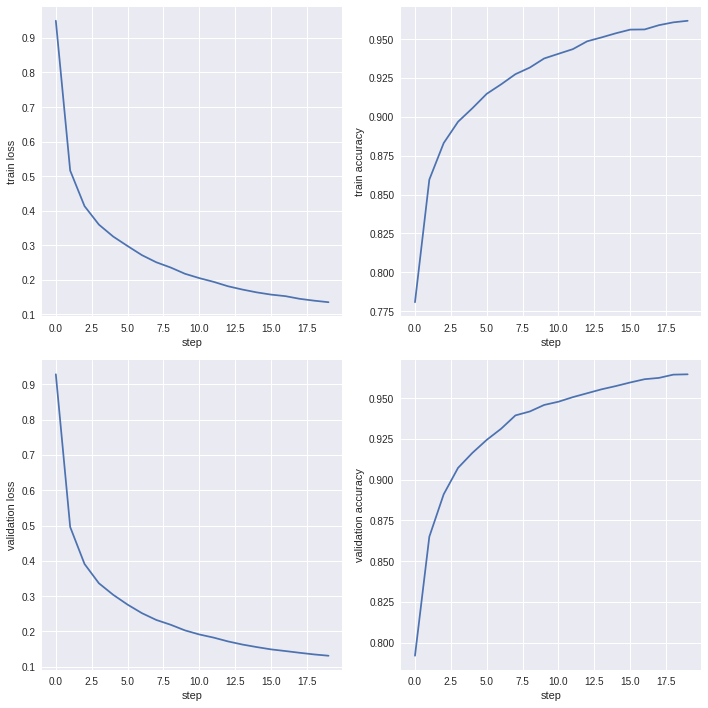

In [54]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(2,2,1)
ax.plot(range(len(train_loss_list)), train_loss_list)
ax.set_xlabel('step')
ax.set_ylabel('train loss')

ax = fig.add_subplot(2,2,2)
ax.plot(range(len(train_acc_list)), train_acc_list)
ax.set_xlabel('step')
ax.set_ylabel('train accuracy')

ax = fig.add_subplot(2,2,3)
ax.plot(range(len(val_loss_list)), val_loss_list)
ax.set_xlabel('step')
ax.set_ylabel('validation loss')

ax = fig.add_subplot(2,2,4)
ax.plot(range(len(val_acc_list)), val_acc_list)
ax.set_xlabel('step')
ax.set_ylabel('validation accuracy')

fig.tight_layout()

### 2) 테스트 데이터 셋을 통한 성능 평가

In [55]:
acc_test = sess.run(accuracy,
                    feed_dict={X: test_images, 
                               y: test_labels})
print("Test 데이터 셋에 대한 평가 결과 : ",acc_test)

Test 데이터 셋에 대한 평가 결과 :  0.9638


<br><br>

## ※ (Optional) Filter시각화하기

### 1) 0번째 Filter 시각화

#### ⓵ 0번째 Convolution 필터 시각화

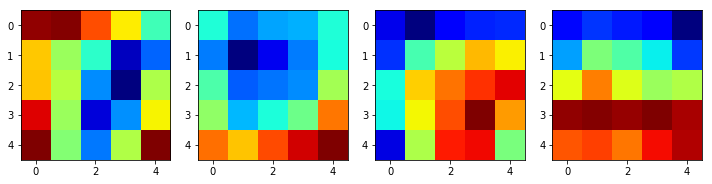

In [0]:
conv_filter_0_ = sess.run(conv_filter_0)
fig = plt.figure(figsize=(10,10))

for i in range(4):

    ax = fig.add_subplot(1,4,i+1)    
    axc = ax.imshow(conv_filter_0_[:,:,0,i], cmap='jet')
    
plt.tight_layout()
plt.show()

#### ⓶ 0번째 출력값 시각화

(1, 24, 24, 4)


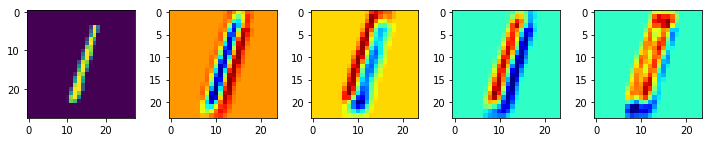

In [0]:
input_image = test_images[2:3]

conv0_ouput = sess.run(conv0, feed_dict={X: input_image})
print(conv0_ouput.shape)
fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(1,5,1)    
ax.imshow(input_image.reshape([28,28]))
for i in range(4):
    ax = fig.add_subplot(1,5,i+2)    
    axc = ax.imshow(conv0_ouput[0,:,:,i], cmap='jet')
    
plt.tight_layout()
plt.show()


### 2) 1번째 필터 시각화

#### ⓵ 1번째 Convolution 필터 시각화

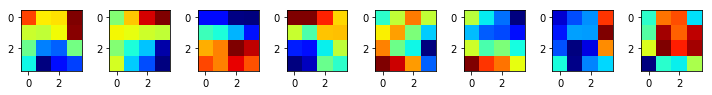

In [0]:
conv_filter_1_ = sess.run(conv_filter_1)
fig = plt.figure(figsize=(10,10))

for i in range(8):

    ax = fig.add_subplot(1,8,i+1)    
    axc = ax.imshow(conv_filter_1_[:,:,0,i], cmap='jet')
    
plt.tight_layout()
plt.show()

#### ⓶ 1번째 출력값 시각화

(1, 9, 9, 8)


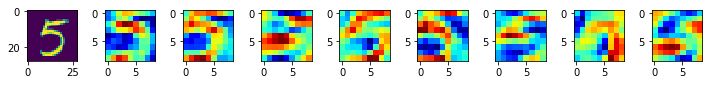

In [0]:
input_image = test_images[2:3]

conv1_ouput = sess.run(conv1, feed_dict={X: input_image})
print(conv1_ouput.shape)
fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(1,9,1)    
ax.imshow(input_image.reshape([28,28]))

for i in range(8):
    ax = fig.add_subplot(1,9,i+2)    
    axc = ax.imshow(conv1_ouput[0,:,:,i], cmap='jet')
    
plt.tight_layout()
plt.show()


#  

---

    Copyright(c) 2019 by Public AI. All rights reserved.
    Writen by PAI, SeonYoul Choi ( best10@publicai.co.kr )  last updated on 2019/02/28


---